# FluxInfer RCA method

In [90]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [ ]:
import sys
sys.path.append('../')
from tsdr import tsdr
from diagnoser import diag
from eval import groundtruth

In [109]:
from meltria import loader

metrics_files = !find /datasets/argowf-chaos-rq54b/ -type f -name "*.json" | head -n 3
dataset_generator = loader.load_dataset_as_generator(metrics_files, target_metric_types={
        "containers": True,
        "services": True,
        "nodes": True,
        "middlewares": True,
    },
    num_datapoints=120,
)
records = [r for rec in dataset_generator for r in rec]

In [ ]:
import networkx as nx
from multiprocessing import cpu_count

In [110]:
record_and_reduced_df: list = []
for record in records:
    # run tsdr
    reducer = tsdr.Tsdr("residual_integral", **{
        "step1_residual_integral_threshold": 20,
        "step1_residual_integral_change_start_point": False,
        "step1_residual_integral_change_start_point_n_sigma": 3,
        "step2_clustering_method_name": "dbscan",
        "step2_dbscan_min_pts": 2,
        "step2_dbscan_dist_type": 'sbd',
        "step2_dbscan_algorithm": 'hdbscan',
        "step2_clustering_series_type": 'raw',
        "step2_clustering_choice_method": 'medoid',
    })
    tsdr_stat, clustering_info, anomaly_points = reducer.run(
        X=record.data_df,
        pk=record.pk,
        max_workers=cpu_count(),
    )
    reduced_df = tsdr_stat[-1][0]
    record_and_reduced_df.append((record, reduced_df))

'ts-preserve-service/pod-network-loss/0'

{'init_graph_nodes_num': 861,
 'init_graph_edges_num': 23885,
 'causal_graph_nodes_num': 0,
 'causal_graph_edges_num': 0,
 'causal_graph_density': 0,
 'causal_graph_flow_hierarchy': nan,
 'building_graph_elapsed_sec': 44.493754863739014}

[(m-ts-inside-payment-service_Tomcat_RequestProcessor_lastRequestProcessingTime,
  0.12731258841179105),
 (n-gke-train-ticket-01-default-pool-9df6151e-x9p0_memory_Active_bytes,
  0.11610931847189754),
 (m-ts-order-other-service_java_lang_Threading_DaemonThreadCount,
  0.09715936418752422),
 (m-ts-order-other-service_java_nio_BufferPool_MemoryUsed, 0.0906163554352421),
 (m-ts-cancel-service_java_nio_BufferPool_MemoryUsed, 0.08808205819842299)]

[(m-ts-auth-mongo_mongodb_ss_opLatencies_latency, 0.14195744794579954),
 (m-ts-auth-mongo_mongodb_ss_wt_cursor_cursor_next_calls_that_skip_less_than_100_entries,
  0.1304655458555875),
 (m-ts-auth-mongo_mongodb_ss_network_numRequests, 0.1254215216400073),
 (m-ts-auth-mongo_mongodb_sys_netstat_TcpExt_TCPSackShiftFallback,
  0.12099295134768064),
 (m-ts-auth-mongo_mongodb_sys_netstat_TcpExt_TCPFastRetrans,
  0.12098127819776693)]

[(c-ts-station-mongo_network_receive_bytes_total, 0.16799640916297626),
 (c-ts-station-service_network_transmit_packets_total, 0.15611850886746234),
 (m-ts-price-mongo_mongodb_top_readLock_count, 0.14765487562643734),
 (s-ts-price_requests_count, 0.13705606033291373),
 (m-ts-station-mongo_mongodb_ss_tcmalloc_tcmalloc_pageheap_scavenge_count,
  0.0776707042184662)]

[(m-ts-travel-mongo_mongodb_sys_netstat_TcpExt_TCPDelivered,
  0.15991264825556298),
 (m-ts-travel-mongo_mongodb_ss_wt_cursor_cursor_reset_calls,
  0.1499137677318097),
 (m-ts-travel-mongo_mongodb_sys_netstat_IpExt_InNoECTPkts,
  0.14842068507777043),
 (m-ts-travel-mongo_mongodb_ss_metrics_operatorCounters_match_eq,
  0.13992670257203826),
 (m-ts-travel-mongo_mongodb_ss_locks_Mutex_acquireCount_r,
  0.08333333333333333)]

[(m-ts-ticket-office-mongo_mongodb_top_readLock_time, 0.20994727971784832),
 (m-ts-ticket-office-mongo_mongodb_sys_cpu_steal_ms, 0.20338332669055587),
 (c-ts-ticket-office-mongo_memory_rss, 0.1522093695195261),
 (m-ts-ticket-office-mongo_mongodb_ss_tcmalloc_tcmalloc_pageheap_free_bytes,
  0.14301538461883362),
 (m-ts-travel2-mongo_mongodb_ss_globalLock_activeClients_total,
  0.10970151131787395)]

[(m-ts-consign-mongo_mongodb_sys_netstat_TcpExt_TCPToZeroWindowAdv,
  0.1765258700964469),
 (m-ts-consign-mongo_mongodb_sys_disks_sda_io_queued_ms, 0.1635672299091272),
 (m-ts-consign-mongo_mongodb_sys_netstat_TcpExt_TCPLossProbes,
  0.15110472824555088),
 (m-ts-consign-mongo_mongodb_ss_logicalSessionRecordCache_lastSessionsCollectionJobDurationMillis,
  0.1481286149577939),
 (m-ts-consign-mongo_mongodb_ss_tcmalloc_tcmalloc_central_cache_free_bytes,
  0.13190238812739133)]

[(m-ts-inside-payment-mongo_mongodb_ss_metrics_cursor_totalOpened,
  0.1429142486648885),
 (m-ts-inside-payment-mongo_mongodb_ss_wt_reconciliation_pages_written_including_at_least_one_start_transaction_ID,
  0.1381416490633298),
 (m-ts-inside-payment-mongo_mongodb_ss_wt_log_logging_bytes_consolidated,
  0.12963454562194013),
 (m-ts-inside-payment-mongo_mongodb_ss_wt_log_log_write_operations,
  0.12685351790529),
 (m-ts-inside-payment-service_java_lang_GarbageCollector_LastGcInfo_id,
  0.11183426331261292)]

[(m-ts-consign-price-mongo_mongodb_sys_netstat_IpExt_InOctets,
  0.26532713305870265),
 (m-ts-consign-price-mongo_mongodb_sys_netstat_IpExt_InNoECTPkts,
  0.24209622558593077),
 (m-ts-consign-price-mongo_mongodb_sys_netstat_TcpExt_TCPHPHits,
  0.161594916874444),
 (m-ts-consign-price-service_java_lang_Threading_TotalStartedThreadCount,
  0.15401927005989574),
 (m-ts-consign-price-mongo_mongodb_sys_cpu_processes, 0.050445145060094204)]

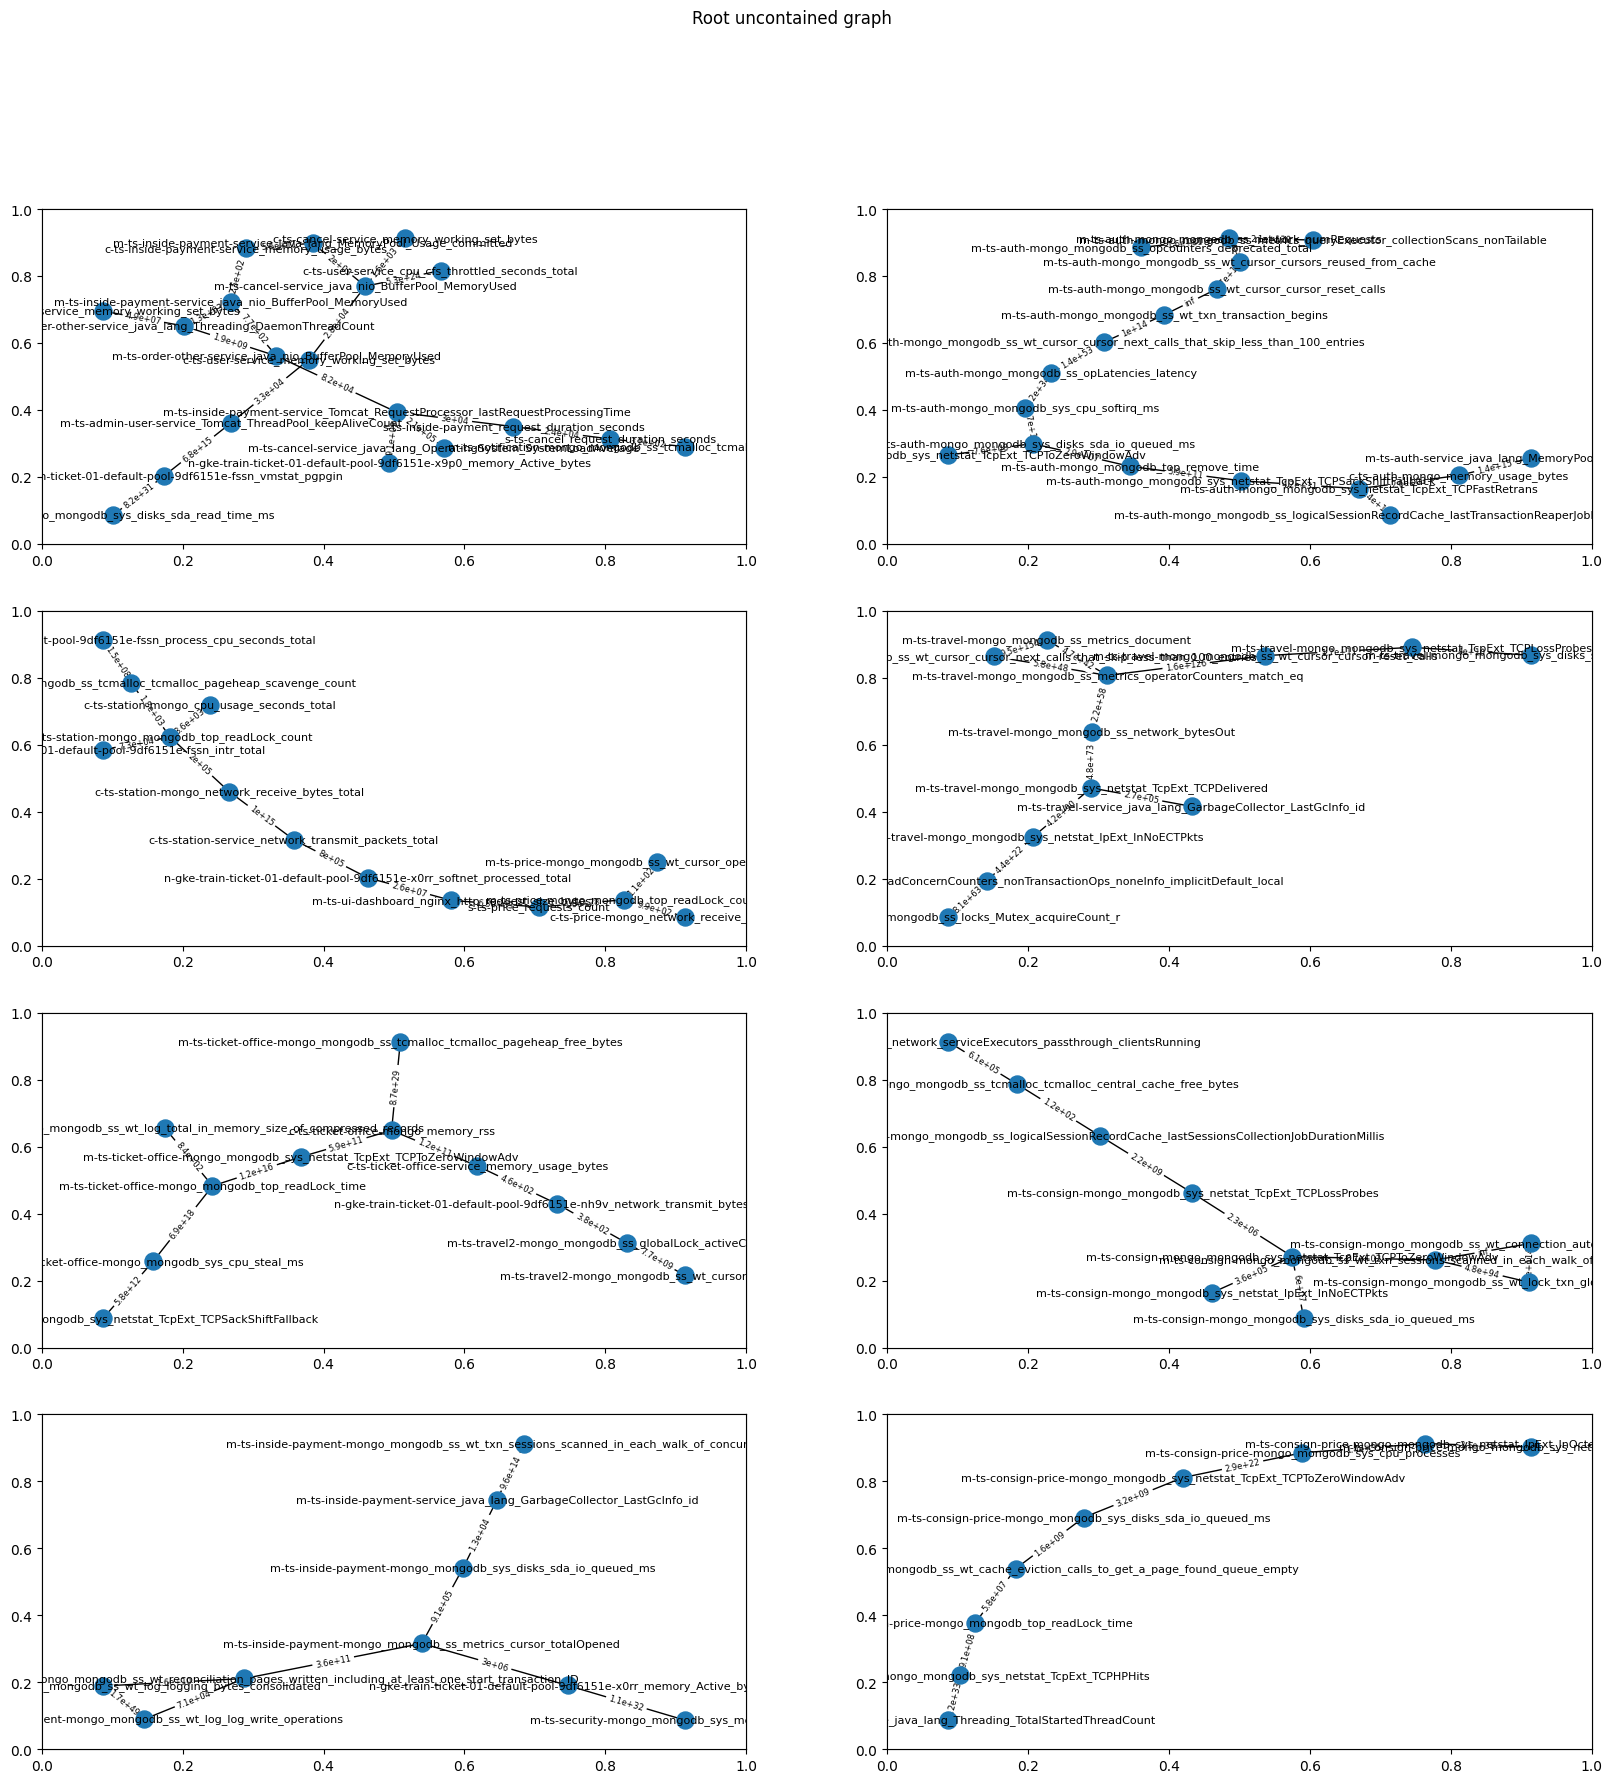

In [115]:
record, reduced_df = record_and_reduced_df[0]
G, (root_contained_g, root_uncontained_g), stats = diag.build_causal_graph(
    reduced_df, record.pk, **{
        'pc_library': 'pcalg',
        'pc_citest': 'fisher-z',
        'pc_citest_alpha': 0.01,
        'pc_variant': 'stable',
        'disable_orientation': True,
    }
)
display(record.chaos_case_full())
display(stats)

fig = plt.figure(1, figsize=(20, 20))
fig.suptitle("Root contained graph")
axs = fig.subplots(4, 2).flatten()
for ax, g in zip(axs, sorted(root_contained_g, key=lambda g: len(g.nodes), reverse=True)[:8]):
    pr = nx.pagerank(g, alpha=0.85) # default
    display(sorted(pr.items(), reverse=True, key=lambda x: x[1])[:5])

    pos=nx.spring_layout(g, weight=None)
    nx.draw_networkx(g, pos=pos, ax=ax, font_size=8, node_size=150)
    elabels = nx.get_edge_attributes(g, 'weight')
    for k, weight in elabels.items():
        elabels[k] = f"{weight:.2g}"
    nx.draw_networkx_edge_labels(g, pos=pos, ax=ax, edge_labels=elabels, font_size=6)

fig.suptitle("Root uncontained graph")
fig = plt.figure(1, figsize=(20, 20))
axs = fig.subplots(4, 2).flatten()
for ax, g in zip(axs, sorted(root_uncontained_g, key=lambda g: len(g.nodes), reverse=True)[:8]):
    pr = nx.pagerank(g, alpha=0.85) # default
    display(sorted(pr.items(), reverse=True, key=lambda x: x[1])[:5])

    pos=nx.spring_layout(g, weight=None)
    nx.draw_networkx(g, pos=pos, ax=ax, font_size=8, node_size=150)
    elabels = nx.get_edge_attributes(g, 'weight')
    for k, weight in elabels.items():
        elabels[k] = f"{weight:.2g}"
    nx.draw_networkx_edge_labels(g, pos=pos, ax=ax, edge_labels=elabels, font_size=6)

In [ ]:
def draw_by_graph(axs, g):
    fig = plt.figure(1, figsize=(20, 20))
    ax = fig.subplots(1, 1)
    pos=nx.spring_layout(g, weight=None)
    nx.draw_networkx(g, pos=pos, ax=ax, font_size=8, node_size=150)
    elabels = nx.get_edge_attributes(g, 'weight')
    for k, weight in elabels.items():
        elabels[k] = f"{weight:.2g}"
    nx.draw_networkx_edge_labels(g, pos=pos, ax=ax, edge_labels=elabels, font_size=6)

fig = plt.figure(1, figsize=(20, 20))
fig.suptitle("Root contained graph")
axs = fig.subplots(4, 2).flatten()
for ax, g in zip(axs, sorted(root_contained_g, key=lambda g: len(g.nodes), reverse=True)[:8]):
    pr = nx.pagerank(g, alpha=0.85) # default
    display(sorted(pr.items(), reverse=True, key=lambda x: x[1])[:5])

    pos=nx.spring_layout(g, weight=None)
    nx.draw_networkx(g, pos=pos, ax=ax, font_size=8, node_size=150)
    elabels = nx.get_edge_attributes(g, 'weight')
    for k, weight in elabels.items():
        elabels[k] = f"{weight:.2g}"
    nx.draw_networkx_edge_labels(g, pos=pos, ax=ax, edge_labels=elabels, font_size=6)

fig.suptitle("Root uncontained graph")
fig = plt.figure(1, figsize=(20, 20))
axs = fig.subplots(4, 2).flatten()
for ax, g in zip(axs, sorted(root_uncontained_g, key=lambda g: len(g.nodes), reverse=True)[:8]):
    pr = nx.pagerank(g, alpha=0.85) # default
    display(sorted(pr.items(), reverse=True, key=lambda x: x[1])[:5])

    pos=nx.spring_layout(g, weight=None)
    nx.draw_networkx(g, pos=pos, ax=ax, font_size=8, node_size=150)
    elabels = nx.get_edge_attributes(g, 'weight')
    for k, weight in elabels.items():
        elabels[k] = f"{weight:.2g}"
    nx.draw_networkx_edge_labels(g, pos=pos, ax=ax, edge_labels=elabels, font_size=6)